#Customers Segmentation based on their Credit Card usage bhaviour


#Importing the required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings(action = 'ignore')

#Reading the File

In [ ]:
df=pd.read_csv('/content/credit_card.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Looking at the descriptive statistics we can see that most of the features have mean way greater than their median. This is a sign of some skewness in the dataset and we have to see if we can do something about it.

#Data Processing

#1. Checking for Missing Values

In [ ]:
missing_value=df.isnull().sum()
missing_value[missing_value>0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

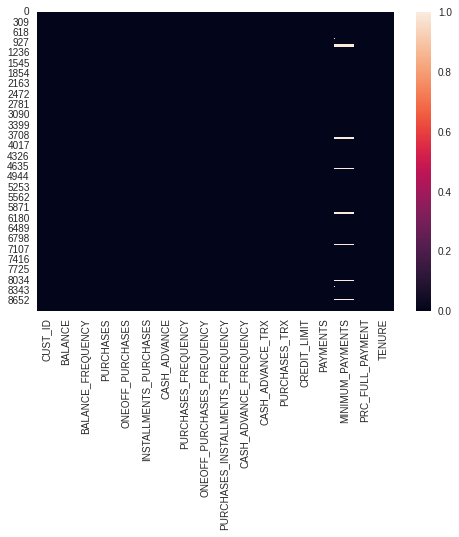

In [ ]:
# using heatmap to check any null value is present
sns.heatmap(df.isnull())

In [ ]:
# there is only one missing value in the credit limit column we are replacing it by the median value
median_value=df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(value=median_value,inplace=True)

In [ ]:
mp_median_value=df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(value=mp_median_value,inplace=True)

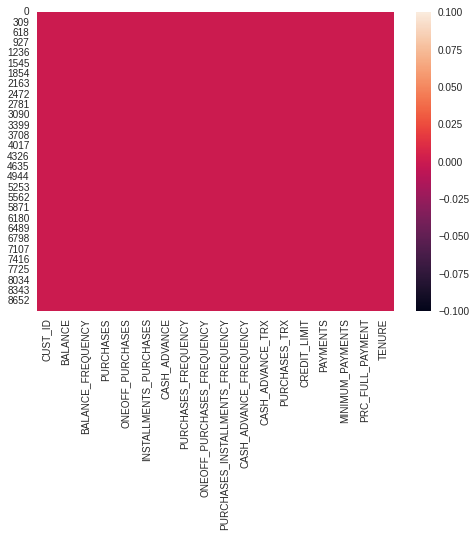

In [ ]:
# using heatmap to check any null value is still present
sns.heatmap(df.isnull())

By, the result of heatmap we can see that we have treated all na values

#2. Categorical Column

There is only one categorical column in the given dataset which is customer id, Customer ID seems to be an unique id for each customer it won't play any role in determining cluster.So we can drop the column.

In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True)

#3. Feature Distribution

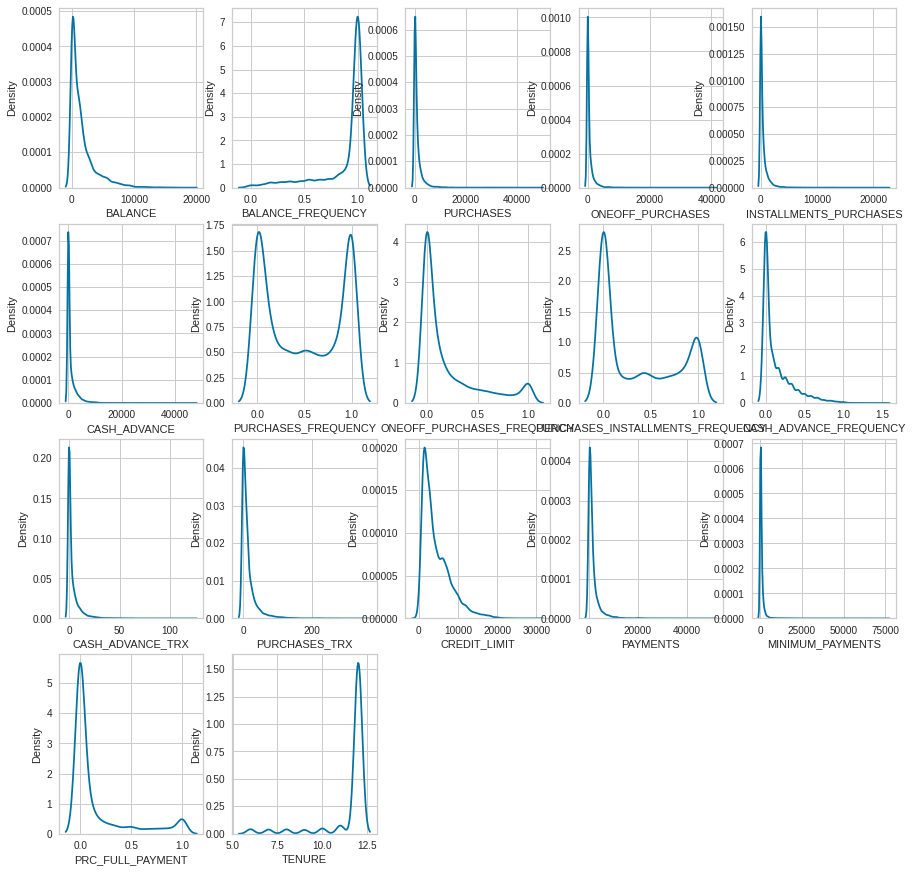

In [ ]:
plt.figure(figsize=(15,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 5, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
plt.show()

So there is a lot of skewness in data. we need to treat it.

#4 Outlier Treatment with using Z-score method

In [ ]:
data=df.copy()

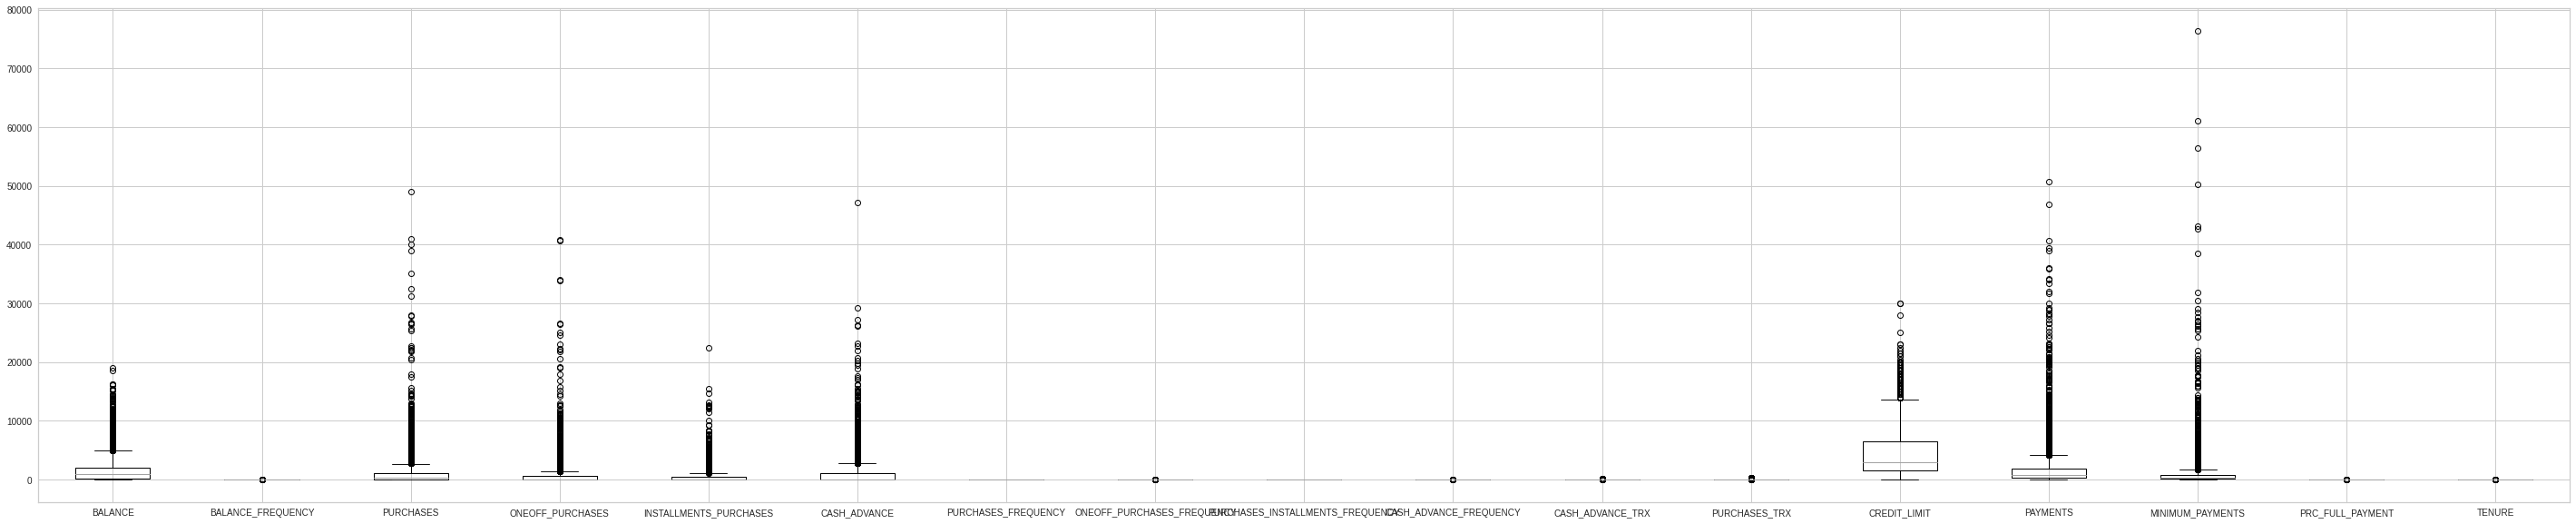

In [ ]:
# Plot to see outlers
data.boxplot(figsize= [50,10])

plt.show()

In [ ]:
def find_outliers(col):
  from scipy import stats
  z=np.abs((stats.zscore(col)))
  idx_outliers=np.where(z>3,True,False)
  return pd.Series(idx_outliers,index=col.index)

In [ ]:
for col in data.columns:
  idx=find_outliers(data[col])
  print("\n")
  print(col)
  print("\n")
  print(idx.value_counts())




BALANCE


False    8754
True      196
dtype: int64


BALANCE_FREQUENCY


False    8774
True      176
dtype: int64


PURCHASES


False    8815
True      135
dtype: int64


ONEOFF_PURCHASES


False    8828
True      122
dtype: int64


INSTALLMENTS_PURCHASES


False    8813
True      137
dtype: int64


CASH_ADVANCE


False    8768
True      182
dtype: int64


PURCHASES_FREQUENCY


False    8950
dtype: int64


ONEOFF_PURCHASES_FREQUENCY


False    8950
dtype: int64


PURCHASES_INSTALLMENTS_FREQUENCY


False    8950
dtype: int64


CASH_ADVANCE_FREQUENCY


False    8751
True      199
dtype: int64


CASH_ADVANCE_TRX


False    8778
True      172
dtype: int64


PURCHASES_TRX


False    8765
True      185
dtype: int64


CREDIT_LIMIT


False    8798
True      152
dtype: int64


PAYMENTS


False    8791
True      159
dtype: int64


MINIMUM_PAYMENTS


False    8848
True      102
dtype: int64


PRC_FULL_PAYMENT


False    8950
dtype: int64


TENURE


False    8556
True      394
dtype: int64


In [ ]:
df_clean = pd.DataFrame()
for col in data.columns:
    idx = find_outliers(data[col])
    df_clean[col] = idx

In [ ]:
idx_outliers = df_clean.any(axis=1)
df_clean_final = data[idx_outliers==False]
df_clean_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df_clean_final.shape

(7434, 17)

In [ ]:
data=df_clean_final.copy()

#5 Correlation

Looking for some correlation now.

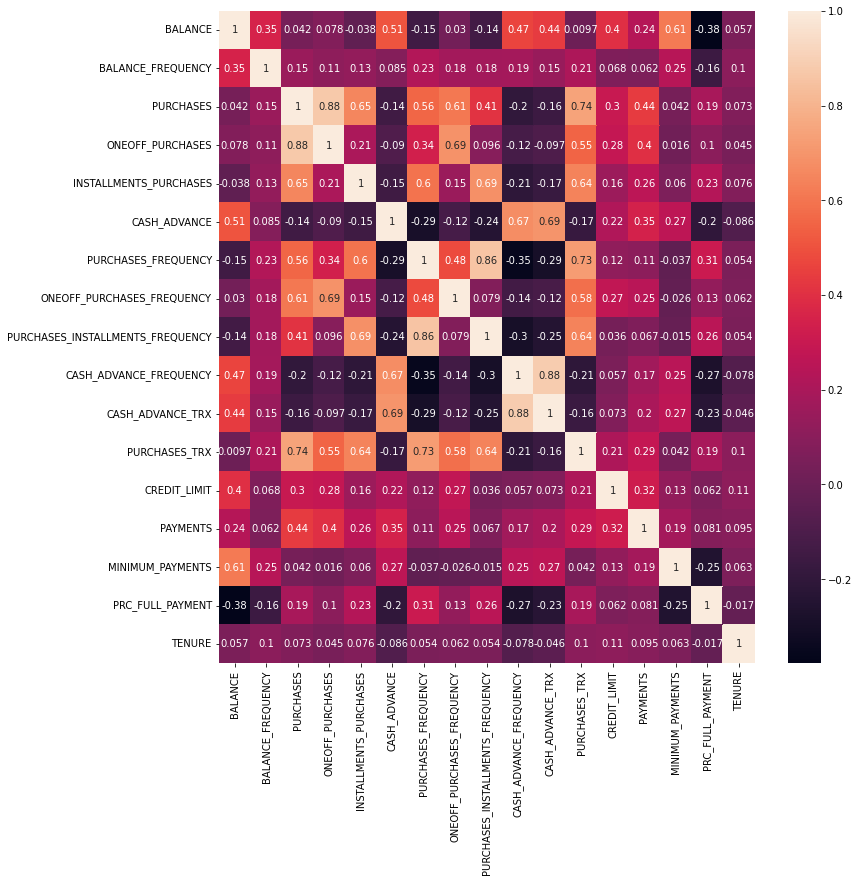

In [ ]:
plt.figure(figsize=(12,12))
vcorr=data.corr()
sns.heatmap(vcorr,annot=True)
plt.show()

We've got some correlated features. 

#6. Modeling 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(data)
df_standardized = pd.DataFrame(df_standardized, columns = df.columns)
df_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.564185,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.637483,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.064164,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,-0.341541,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.428562,-0.531523,0.312187


In [ ]:
df_standardized.shape

(7434, 17)

# 1. Dimensionality Reduction using PCA

In [ ]:
df_pca=df_standardized.copy()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = .95, random_state=1)
pca.fit(df_pca)
reduced = pca.transform(df_pca)

In [ ]:
print(pca.explained_variance_)

[4.924104   3.46795305 1.62343347 1.30764554 1.07374093 0.91185721
 0.79274999 0.65671809 0.58087627 0.48130507 0.30843797 0.29438894]


In [ ]:
print(pca.explained_variance_ratio_)

[0.28961421 0.2039698  0.09548324 0.07690998 0.06315273 0.05363144
 0.04662608 0.03862528 0.0341646  0.02830825 0.01814097 0.01731467]


In [ ]:
print("variance by all the components=",sum(pca.explained_variance_ratio_*100))

variance by all the components= 96.59412550088524


In [ ]:
reduced.shape

(7434, 12)

In [ ]:
PCA_df = pd.DataFrame(data = reduced, columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10','PC11','PC12'])

# head() to display top three rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.330768,-2.040078,0.194250,-0.639089,0.057836,-0.317268,0.647323,-0.190390,-0.265565,-0.123135,0.045317,-0.274390
1,-2.776060,3.320091,0.448878,1.499837,-1.857844,0.202913,-0.351830,0.467549,-1.038392,1.489496,1.371819,-1.824810
2,1.238120,0.543209,1.467017,-2.068481,0.481477,0.020734,-1.691208,-0.287387,0.745240,0.996233,-0.764344,-0.482474
3,-0.574576,-0.219448,1.978095,-0.780477,-0.681344,0.587313,0.031851,-1.070381,0.398996,-1.286579,0.852173,0.568379
4,-1.452052,-1.461353,0.261806,-1.155366,0.203182,-0.412883,0.322843,0.255598,-0.788559,-0.030674,-0.081372,-0.367507


#2. K-means clustering using the elbow method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,10):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(reduced)
    print('The SH Score for {} is {}'.format(k,silhouette_score(reduced,km.labels_)))

The SH Score for 2 is 0.21307026368520351
The SH Score for 3 is 0.21284992396182556
The SH Score for 4 is 0.1924620111999321
The SH Score for 5 is 0.19405670032563246
The SH Score for 6 is 0.20032453102535144
The SH Score for 7 is 0.2091366987664322
The SH Score for 8 is 0.20996110302621593
The SH Score for 9 is 0.1933052367982654


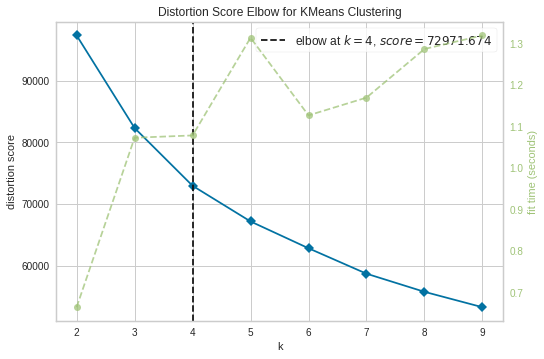

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
visualizer=KElbowVisualizer(km,k=(2,10))

visualizer.fit(reduced)
visualizer.show()

In [ ]:
km=KMeans(n_clusters=4)
km.fit(reduced)

KMeans(n_clusters=4)

In [ ]:
cluster_predict=km.predict(reduced)

It seems like the elbow is around 4.

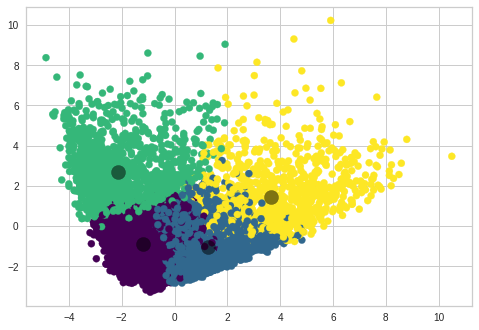

In [ ]:
plt.scatter(reduced[:, 0], reduced[:, 1], c=cluster_predict, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
labels=km.labels_

In [ ]:
labels

array([0, 2, 3, ..., 0, 1, 0], dtype=int32)

In [ ]:
df_output = PCA_df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
df_output['Cluster'] = km.labels_

# head() to display top five rows
df_output.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Cluster
0,-1.330768,-2.040078,0.194250,-0.639089,0.057836,-0.317268,0.647323,-0.190390,-0.265565,-0.123135,0.045317,-0.274390,0
1,-2.776060,3.320091,0.448878,1.499837,-1.857844,0.202913,-0.351830,0.467549,-1.038392,1.489496,1.371819,-1.824810,2
2,1.238120,0.543209,1.467017,-2.068481,0.481477,0.020734,-1.691208,-0.287387,0.745240,0.996233,-0.764344,-0.482474,3
3,-0.574576,-0.219448,1.978095,-0.780477,-0.681344,0.587313,0.031851,-1.070381,0.398996,-1.286579,0.852173,0.568379,0
4,-1.452052,-1.461353,0.261806,-1.155366,0.203182,-0.412883,0.322843,0.255598,-0.788559,-0.030674,-0.081372,-0.367507,0


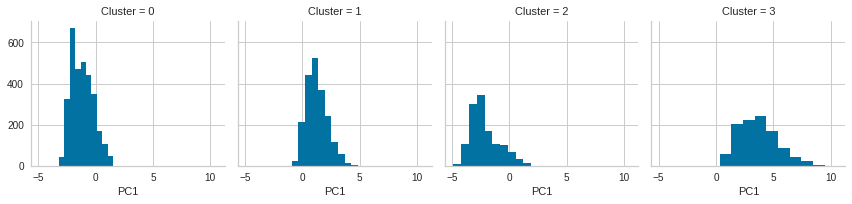

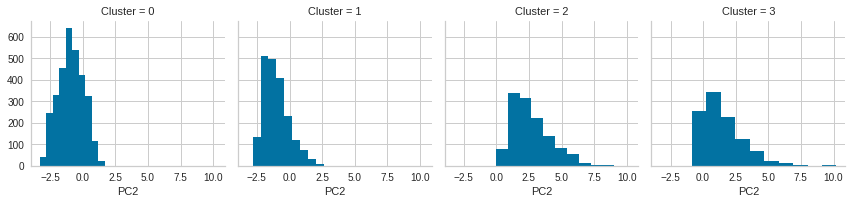

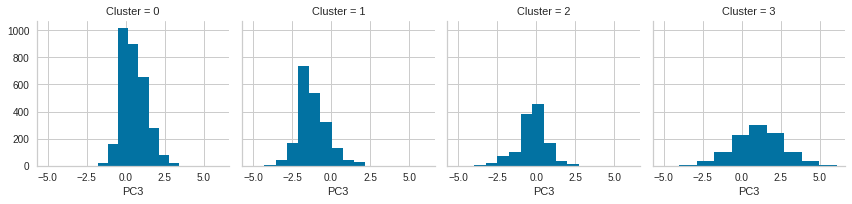

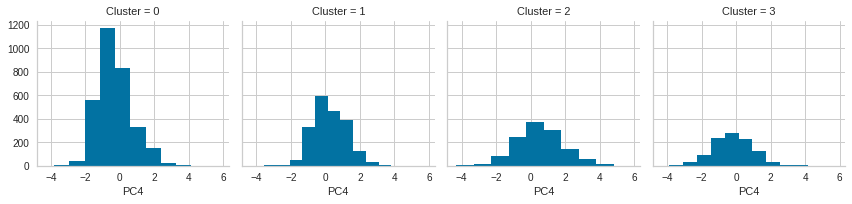

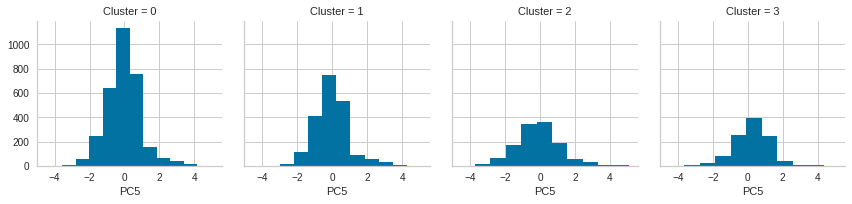

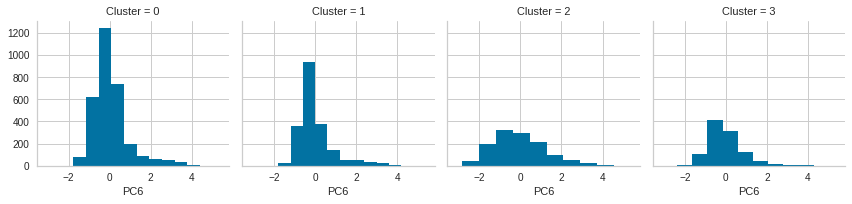

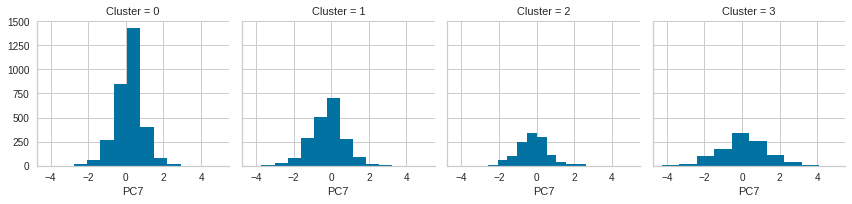

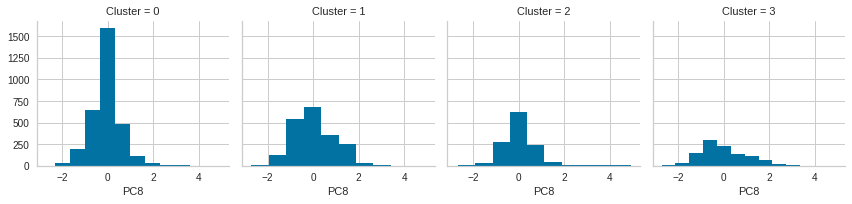

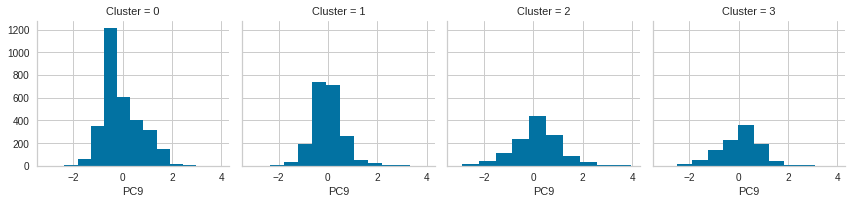

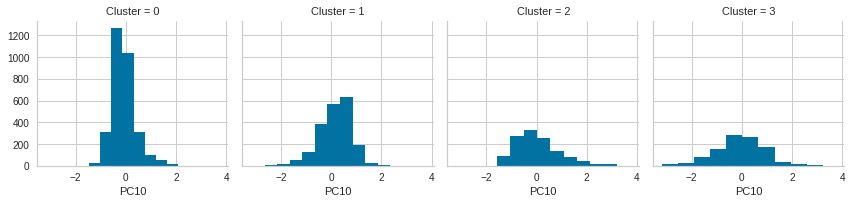

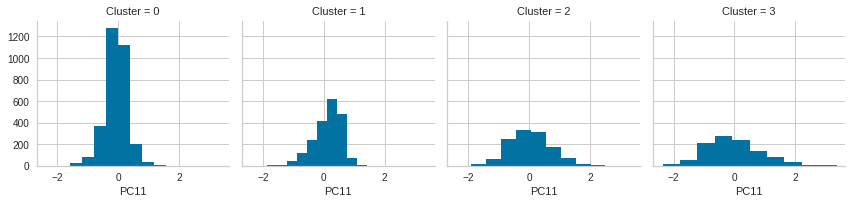

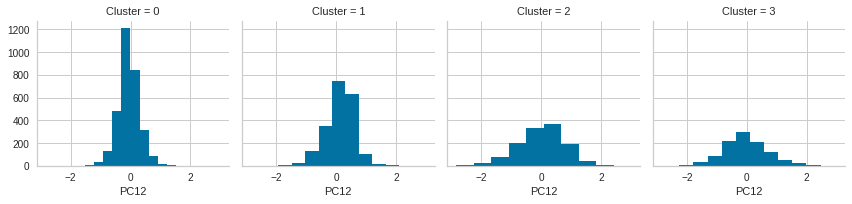

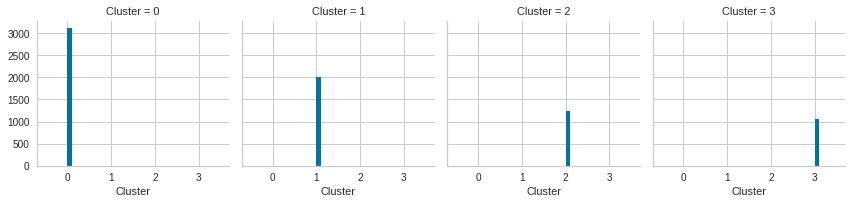

In [ ]:
for c in df_output:
    grid= sns.FacetGrid(df_output, col='Cluster')
    grid.map(plt.hist, c)